# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. We will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.



In [28]:
pwd

'C:\\Users\\Windows 10'

In [29]:
# used for manipulating directory paths
import os
from sklearn.metrics import mean_squared_error
# Scientific and vector computation for python
import numpy as np
import pandas as pd
import seaborn as sns
# Plotting library
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [30]:
# Read comma separated data
data = pd.read_csv(r"E:\GUC\Semester 10\NETW 1013\Assignments\house_prices_data_training_data.csv")
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
data=data.drop(columns =['id','date'])


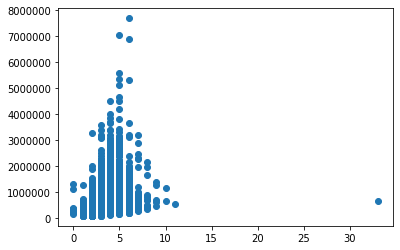

In [32]:
plt.scatter(data["bedrooms"], data["price"])
plt.show()

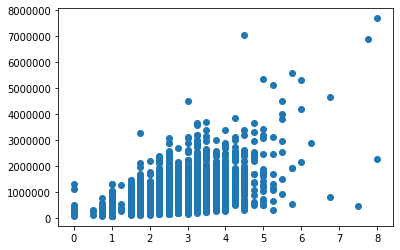

In [33]:
plt.scatter(data["bathrooms"], data["price"])
plt.show()

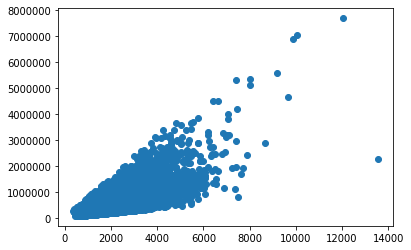

In [34]:
plt.scatter(data["sqft_living"], data["price"])
plt.show()

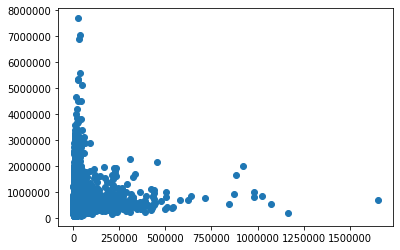

In [35]:
plt.scatter(data["sqft_lot"], data["price"])
plt.show()

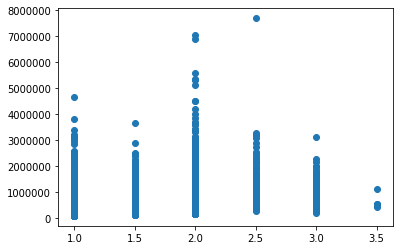

In [36]:
plt.scatter(data["floors"], data["price"])
plt.show()

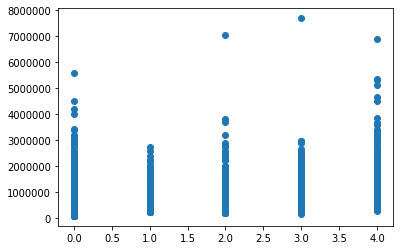

In [37]:
plt.scatter(data["view"], data["price"])
plt.show()

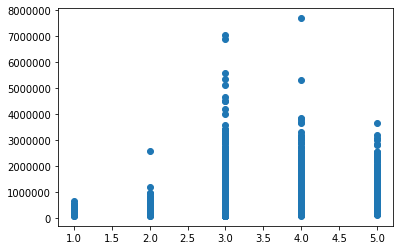

In [38]:
plt.scatter(data["condition"], data["price"])
plt.show()

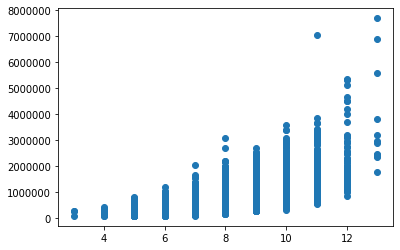

In [39]:
plt.scatter(data["grade"], data["price"])
plt.show()

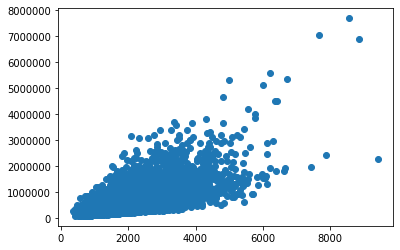

In [40]:
plt.scatter(data["sqft_above"], data["price"])
plt.show()

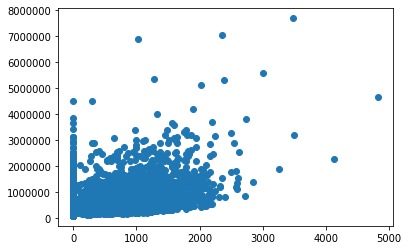

In [41]:
plt.scatter(data["sqft_basement"], data["price"])
plt.show()

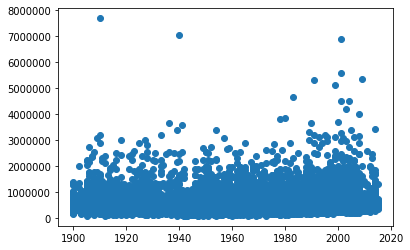

In [42]:
plt.scatter(data["yr_built"], data["price"])
plt.show()

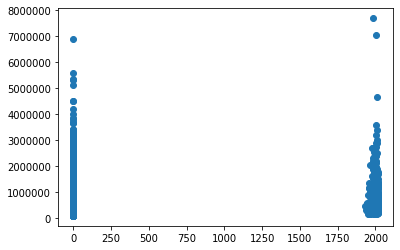

In [43]:
plt.scatter(data["yr_renovated"], data["price"])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'view'

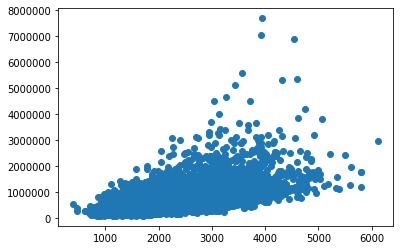

In [44]:
plt.scatter(data["sqft_living15"], data["price"])
plt.view()

In [ ]:
plt.scatter(data["sqft_lot15"], data["price"])
plt.view()

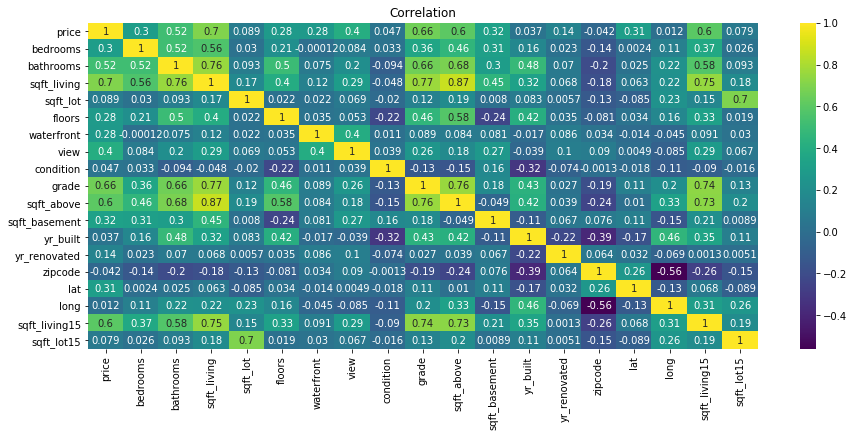

In [45]:
plt.figure(figsize=(15,6))
plt.title('Correlation')
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white')
plt.show()

In [46]:
data=data.drop(columns =['bedrooms','sqft_lot','floors','waterfront','view','condition',
                        'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_lot15'])
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800




If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [62]:
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


In [63]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [64]:
datatrain, datavalidate, datatest = train_validate_test_split(data)

In [65]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    # ================================================================
    return X_norm, mu, sigma

In [66]:
datatrainnorm,datatrainmu,datatrainsigma=featureNormalize(datatrain)
datavalidatenorm,datavalidatemu,datavalidatesigma=featureNormalize(datavalidate)
datatestnorm,datatestmu,datatestsigma=featureNormalize(datatest)

After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [67]:
datatrain = pd.DataFrame(np.concatenate([np.ones((len(datatrain.index), 1)), datatrainnorm], axis=1))
datavalidate = pd.DataFrame(np.concatenate([np.ones((len(datavalidate.index), 1)), datavalidatenorm], axis=1))
datatest = pd.DataFrame(np.concatenate([np.ones((len(datatest.index), 1)), datatestnorm], axis=1))

<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [68]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J


In [69]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [70]:
alpha = 0.1
num_iters = 400
#Training Data
datatraintemp=datatrain
price=datatrain.iloc[:,1]
datatraintemp=datatraintemp.drop(columns=1)
theta1 = np.zeros(2)
theta2 = np.zeros(3)
theta3 = np.zeros(4)
theta4 = np.zeros(5)
theta5 = np.zeros(6)
theta1, jtrain1 = gradientDescentMulti(datatraintemp.iloc[:,0:2],price, theta1, alpha, num_iters)
theta2, jtrain2 = gradientDescentMulti(datatraintemp.iloc[:,0:3],price, theta2, alpha, num_iters)
theta3, jtrain3 = gradientDescentMulti(datatraintemp.iloc[:,0:4],price, theta3, alpha, num_iters)
theta4, jtrain4 = gradientDescentMulti(datatraintemp.iloc[:,0:5],price, theta4, alpha, num_iters)
theta5, jtrain5 = gradientDescentMulti(datatraintemp.iloc[:,0:6],price, theta5, alpha, num_iters)

In [71]:
jtrain1=jtrain1[num_iters-1]
jtrain2=jtrain2[num_iters-1]
jtrain3=jtrain3[num_iters-1]
jtrain4=jtrain4[num_iters-1]
jtrain5=jtrain5[num_iters-1]

In [72]:
print("Cost Function for training data from degree 1 till 5")
print(jtrain1)
print(jtrain2)
print(jtrain3)
print(jtrain4)
print(jtrain5)

Cost Function for training data from degree 1 till 5
0.36176634250032785
0.24900622114786497
0.23228748112698086
0.22979185824455448
0.2296332851421609


In [73]:
print("Theta values for degree 5")
print(theta5)

Theta values for degree 5
0    6.431048e-17
2   -7.415066e-02
3    6.318564e-01
4    3.133906e-01
5   -1.516350e-01
6    3.036075e-02
Name: 1, dtype: float64


In [74]:
#Cross Validation data
datavalidatetemp=datavalidate
price=datavalidate.iloc[:,1]
datavalidatetemp=datavalidatetemp.drop(columns=1)
jvalidate1=computeCostMulti(datavalidatetemp.iloc[:,0:2],price,theta1)
jvalidate2=computeCostMulti(datavalidatetemp.iloc[:,0:3],price,theta2)
jvalidate3=computeCostMulti(datavalidatetemp.iloc[:,0:4],price,theta3)
jvalidate4=computeCostMulti(datavalidatetemp.iloc[:,0:5],price,theta4)
jvalidate5=computeCostMulti(datavalidatetemp.iloc[:,0:6],price,theta5)

In [75]:
print("Cost Function for validating data from degree 1 till 5")
print(jvalidate1)
print(jvalidate2)
print(jvalidate3)
print(jvalidate4)
print(jvalidate5)

Cost Function for validating data from degree 1 till 18
0.35246887297111756
0.2505336070803104
0.22359095546044133
0.22213779969568542
0.22100405842013568


In [77]:
#Testing data
datatesttemp=datatest
price=datatest.iloc[:,1]
datatesttemp=datatesttemp.drop(columns=1)
jtest5=computeCostMulti(datatesttemp.iloc[:,0:6],price,theta5)
print(jtest5)

0.24487126443151355


In [78]:
#House Price Prediction using Linear Regression
pricepredict = np.dot(datatesttemp, theta5)
print(pricepredict)
print(price)

[ 0.98303297 -0.20106628 -0.27700085 ...  0.07483502  0.34462263
  1.05074274]
0       0.567303
1      -0.568240
2      -0.792545
3      -0.400011
4       1.310312
          ...   
3596    1.184141
3597   -0.508519
3598    0.308792
3599    0.427112
3600    3.286998
Name: 1, Length: 3601, dtype: float64


In [79]:
#House Prices after removing normalization
pricepredict=(pricepredict*datatestsigma['price'])+datatestmu['price']
print(pricepredict)
price=(price*datatestsigma['price'])+datatestmu['price']
print(price)

[878273.28948178 455955.25582418 428872.61077124 ... 554357.55769503
 650579.36780867 902422.4932717 ]
0        730000.0
1        325000.0
2        245000.0
3        385000.0
4        995000.0
          ...    
3596     950000.0
3597     346300.0
3598     637800.0
3599     680000.0
3600    1700000.0
Name: 1, Length: 3601, dtype: float64


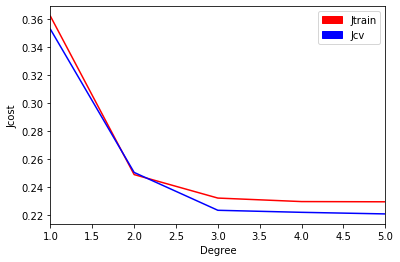

In [80]:
#Plot Jtrain and Jcv cost function against degree
degree=[1,2,3,4,5]
jtraincost=[jtrain1,jtrain2,jtrain3,jtrain4,jtrain5]
jcvcost=[jvalidate1,jvalidate2,jvalidate3,jvalidate4,jvalidate5]
plt.plot(degree, jtraincost,'r') 
plt.plot(degree, jcvcost, 'b')
plt.xlim([1, 5])
plt.xlabel('Degree')
plt.ylabel('Jcost')
red_patch = mpatches.Patch(color='red', label='Jtrain')
blue_patch = mpatches.Patch(color='blue', label='Jcv')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

In [81]:
#RMSE for the linear regression model
mean_squared_error(price,pricepredict,squared=False)

249594.74094634858